In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.metrics import confusion_matrix
import scipy.linalg as la
import sklearn.datasets as ds

# Regressão Linear

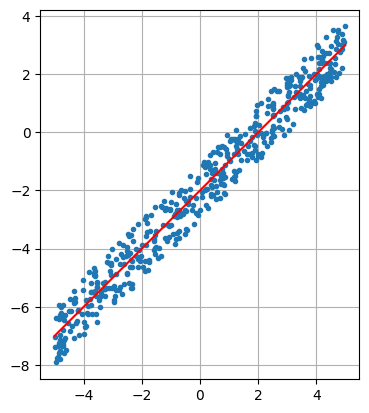

In [2]:
D=pickle.load(open('RegressData001.p', 'rb'))
(x,y)=(D['x'],D['y'])

plt.plot(x[0,:], y[0,:],'.')
plt.axis('scaled')
plt.grid(True)
plt.plot(np.array([-5,5]), np.array([-5, 5])-2, 'r')

In [3]:
# Construir X (2 × 500) - 2ª linha s ´o com “1s”
X=np.vstack((np.ones(500), x))
Rx=np.dot(X,X.T) # matrix 2 × 2
rxy=np.dot(X,y.T) # vector 2 × 1
# Estimar pesos
w=np.dot(la.pinv(Rx), rxy)
print(w)

[[-2.01391133]
 [ 0.99728753]]


## Erros

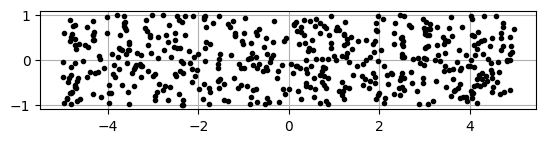

In [4]:
ye = np.dot(w.T, X)
e = y-ye

plt.plot(x[0,:], e[0,:], 'k.')
plt.axis('scaled')
plt.grid(True)

## coeficiente de r2

In [5]:
m = np.mean(y)
Vtot = np.mean((y-m)**2)
Pe = np.mean(e**2)
R2 = 1-Pe/Vtot
print(R2)

0.965452847371007


### polinomio segundo grau

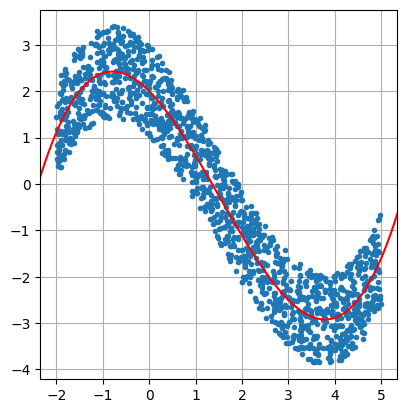

In [6]:
D=pickle.load(open('RegressData002.p', 'rb'))
(x,y)=(D['x'],D['y'])

plt.plot(x[0,:], y[0,:],'.')
plt.axis('scaled')
plt.grid(True)

t=np.linspace(-3, 6, 500)
plt.plot(t, 1/9*t**3-1/2*t**2-t+2, 'r')

[[ 1.11538364]
 [-0.91987301]]


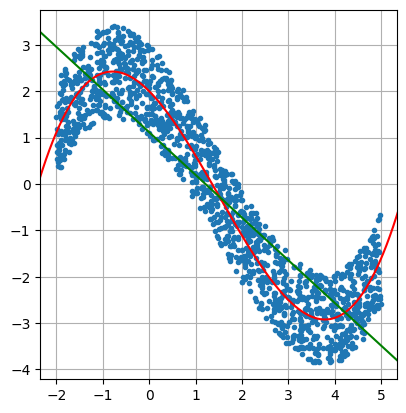

In [7]:
# Construir X (2 × 500) - 2ª linha s ´o com “1s”
X=np.vstack((np.ones(x.shape[1]), x))
Rx=np.dot(X,X.T) # matrix 2 × 2
rxy=np.dot(X,y.T) # vector 2 × 1
# Estimar pesos
w=np.dot(la.pinv(Rx), rxy)
print(w)

plt.plot(x[0,:], y[0,:],'.')
plt.axis('scaled')
plt.grid(True)

t=np.linspace(-3, 6, 500)
plt.plot(t, 1/9*t**3-1/2*t**2-t+2, 'r')
plt.plot(np.array([-3,6]), np.array([-3,6])*w[1]+w[0], 'g')

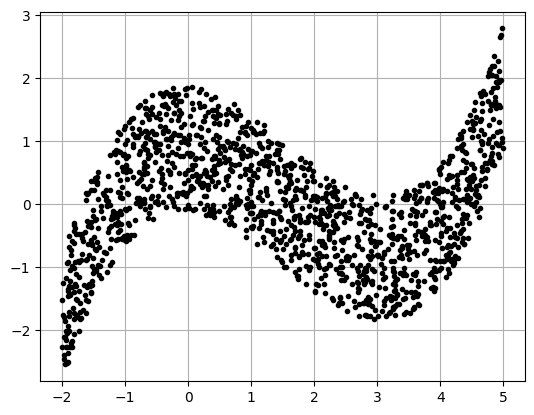

In [8]:
ye = np.dot(w.T, X)
e = y-ye

plt.plot(x[0,:], e[0,:], 'k.')
plt.axis('scaled')
plt.grid(True)

In [9]:
m = np.mean(y)
Vtot = np.mean((y-m)**2)
Pe = np.mean(e**2)
R2 = 1-Pe/Vtot
print(R2)

0.8001643397731499


[[ 2.01160905]
 [-0.98245165]
 [-0.51315283]
 [ 0.11294984]]


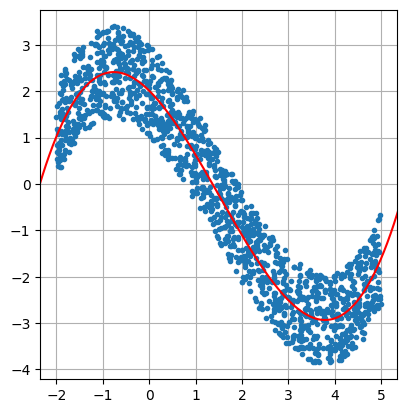

In [10]:
# Construir X (2 × 500) - 2ª linha s ´o com “1s”
X=np.vstack((np.ones(x.shape[1]), x, x**2, x**3))
Rx=np.dot(X,X.T) # matrix 2 × 2
rxy=np.dot(X,y.T) # vector 2 × 1
# Estimar pesos
w=np.dot(la.pinv(Rx), rxy)
print(w)

plt.plot(x[0,:], y[0,:],'.')
plt.axis('scaled')
plt.grid(True)

t=np.linspace(-3, 6, 500)
plt.plot(t, w[3]*t**3+w[2]*t**2+w[1]*t+w[0], 'r')

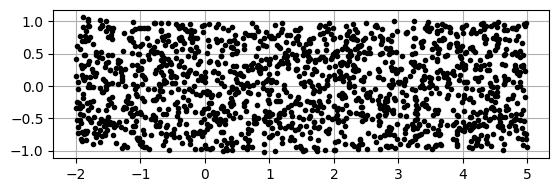

In [11]:
ye = np.dot(w.T, X)
e = y-ye

plt.plot(x[0,:], e[0,:], 'k.')
plt.axis('scaled')
plt.grid(True)

In [12]:
m = np.mean(y)
Vtot = np.mean((y-m)**2)
Pe = np.mean(e**2)
R2 = 1-Pe/Vtot
print(R2)

0.9255804391025634


# Boston

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

D = pickle.load(open('BostonDataset.p', 'rb'))
print(D.keys())
print(D.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX

In [14]:
X = D.data
y = D.target
X1, X2, y1, y2 = train_test_split(X, y, test_size=1/3, shuffle=True, random_state=42)

rl = LinearRegression().fit(X1, y1)
print(rl.score(X1, y1))
print(rl.score(X2, y2))

0.7389831456966496
0.7262099239984441


In [15]:
print(rl.intercept_)
w = rl.coef_
print(w)

33.440834273883354
[-1.29469552e-01  3.79597901e-02  6.09783935e-02  3.21349778e+00
 -1.64996136e+01  3.91151860e+00 -1.26019052e-02 -1.42774164e+00
  2.39545629e-01 -8.17982439e-03 -9.35991036e-01  1.19478911e-02
 -5.46562433e-01]


In [16]:
Xa = np.vstack((np.ones(X1.shape[0]), X1.T))

Rx = np.dot(Xa, Xa.T)
rxy = np.dot(Xa, y1.T)
w2 = np.dot(la.pinv(Rx), rxy)
print(w2)

[ 3.34408343e+01 -1.29469552e-01  3.79597901e-02  6.09783935e-02
  3.21349778e+00 -1.64996136e+01  3.91151860e+00 -1.26019052e-02
 -1.42774164e+00  2.39545629e-01 -8.17982439e-03 -9.35991036e-01
  1.19478911e-02 -5.46562433e-01]


In [17]:
ya = np.dot(w2.T, Xa)
m = np.mean(y1)
V = np.mean((y1-m)**2)
P = np.mean((y1-ya)**2)
print(1-P/V)

0.7389831456966496


 # Regressão Polinomial

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False).fit(X1)
X1a = poly.transform(X1)
X2a = poly.transform(X2)
print(X1a.shape)
rl = LinearRegression().fit(X1a, y1)
print(rl.score(X1a, y1))
print(rl.score(X2a, y2))

(337, 559)
1.0
-133.36697556830654


In [19]:
print(rl.coef_.max())

1.5942627150240103


In [20]:
y1e = rl.predict(X1a)
print(y1e[:10])
print(y1[:10])

print()

y2e = rl.predict(X2a)
print(y2e[:10])
print(y2[:10])

[27.1 20.1 19.8 21.  41.3 23.2 20.4 18.5 29.4 36.4]
[27.1 20.1 19.8 21.  41.3 23.2 20.4 18.5 29.4 36.4]

[ 20.90823935  60.62796262  -9.20961185  32.46395526  20.8776215
 -26.36721918  17.19974484   8.30127613  -7.19474958  14.89407173]
[23.6 32.4 13.6 22.8 16.1 20.  17.8 14.  19.6 16.8]


## Regularização

In [21]:
from sklearn.linear_model import Ridge, Lasso

D = pickle.load(open('BostonDataset.p', 'rb'))
X = D.data
y = D.target

X1, X2, y1, y2 = train_test_split(X, y, test_size=1/3, shuffle=True, random_state=42)

poly = PolynomialFeatures(degree=2, include_bias=False).fit(X1)
X1a = poly.transform(X1)
X2a = poly.transform(X2)

#rl = Ridge(alpha=1).fit(X1a, y1)
rl = Lasso(alpha=1).fit(X1a, y1)
print('R2 (treino):', rl.score(X1a, y1))
print('R2 (teste):', rl.score(X2a, y2))

R2 (treino): 0.8914413224692754
R2 (teste): 0.8329182239945708


/home/eduardo/Desktop/LEIM/GitHub/5s/ISEL_AA/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.935e+03, tolerance: 2.977e+00
  model = cd_fast.enet_coordinate_descent(


57


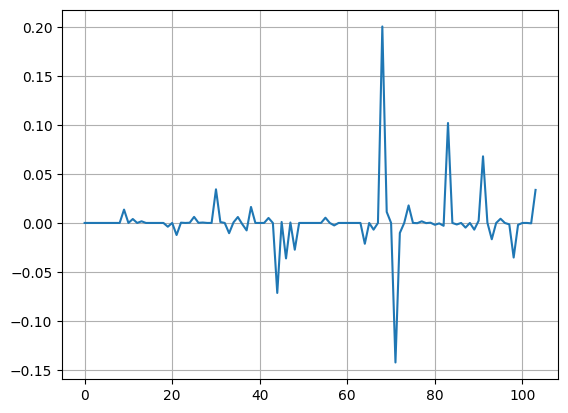

In [22]:
w = rl.coef_
plt.plot(w)
plt.grid(True)

print(np.sum(np.abs(w) > 1e-10))
#quanto mais perto do 0 melhor

# Regressão linear para sinais sonoros

In [26]:
import scipy.signal as sg
import scipy.io.wavfile as wav
from soundPlay import soundPlay

wavFile = 'Violin.arco.ff.sulG.Gb4.mono.wav'
fs, x = wav.read(wavFile)

ModuleNotFoundError: No module named 'pyaudio'